In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

In [42]:
# Read data from csv
vectors = pd.read_csv('vec.csv')

In [43]:
# Get the rows from vector data that contain the X coordinates and its timestamps
vector_coords = vectors[(vectors.type == "vector") & (vectors.name == "posX:vector")]

In [44]:
# Convert a long string of numbers to a list of numbers
def string_of_floats_to_list_of_floats(string, separator):
    return [float(n) for n in string.split(separator)]

In [45]:
# Get the timestamps of X coordinates from the rows
x = string_of_floats_to_list_of_floats(vector_coords.iloc[[0]].vectime.values[0], ' ')

In [46]:
# Get the Y coordinates
y = []

# Go over each timestamp
for t in x:
    tmp = 0
    # Go over each vector
    for v in range(len(vector_coords)):
        # Parse the timestamps from the vectors
        times = string_of_floats_to_list_of_floats(vector_coords.iloc[[v]].vectime.values[0], ' ')
        # If a car was on the road at the current timestamp, add it to the counter
        if t in times:
            tmp += 1
    # Save number of cars for the current timestamp
    y.append(tmp)

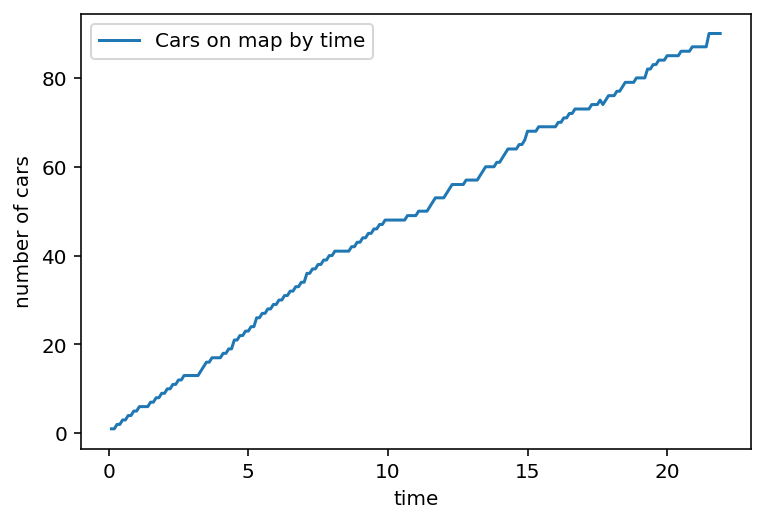

In [47]:
plt.plot(x,y, label="Cars on map by time")
plt.xlabel("time")
plt.ylabel("number of cars")
plt.legend()

In [48]:
# Find car #0
car0 = vectors[(vectors.type == "vector") & (vectors.name == "allDetectedCars")].iloc[[0]]

In [49]:
# Get time data from car #0
x = string_of_floats_to_list_of_floats(car0.vectime.values[0], ' ')

In [50]:
# Get number of cars by time from car #0
y = string_of_floats_to_list_of_floats(car0.vecvalue.values[0], ' ')

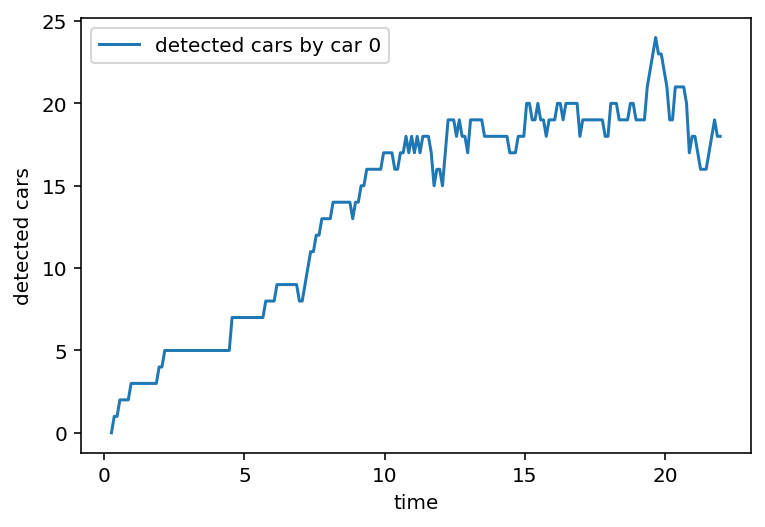

In [51]:
plt.plot(x,y, label="detected cars by car 0")
plt.xlabel("time")
plt.ylabel("detected cars")
plt.legend()

In [52]:
# Get CBR data detected by car #0
cbr0 = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")].iloc[[0]]

In [53]:
# Get time data from vector
x = string_of_floats_to_list_of_floats(cbr0.vectime.values[0], ' ')

In [54]:
# Get CBR data by time from vector
y = string_of_floats_to_list_of_floats(cbr0.vecvalue.values[0], ' ')

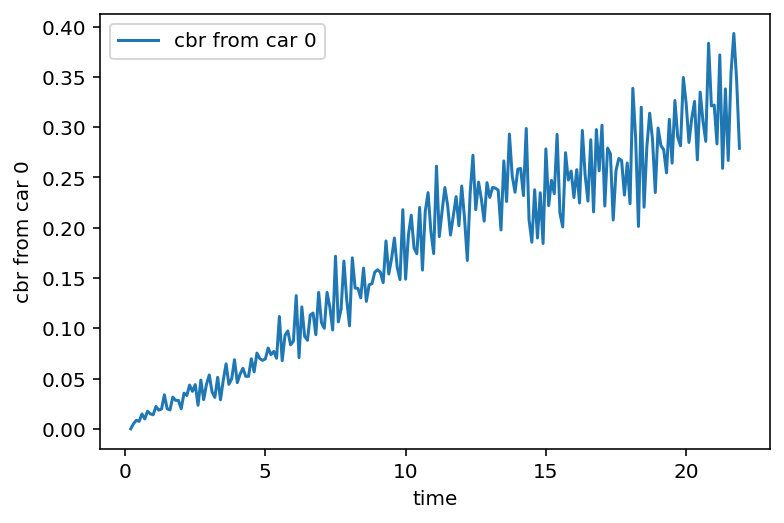

In [55]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr from car 0")
plt.legend()

In [56]:
# Get every car's CBR vector data
cbr = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")]

In [57]:
# Get time data of the CBRs as floats
vectimes = [string_of_floats_to_list_of_floats(c.vectime, ' ') for c in cbr.itertuples()]
# Get the value data of the CBRs as floats
vecvalues = [string_of_floats_to_list_of_floats(c.vecvalue, ' ') for c in cbr.itertuples()]

time_values = []

# Zip times and values together
for i in range(len(vectimes)):
    time_values.append(list(zip(vectimes[i], vecvalues[i])))

In [58]:
# Time can be extracted from the first vector, since the first car was on the road the whole time
times = vectimes[0]
values = 0
vecvalues = []

# Iterate over times
for t in times:
    # Iterate over zipped times and values for each car
    for tv in time_values:
        # Time and value data of one car
        for time, value in tv:
            # If the actual car was on the road at the current timestamp,
            # add its CBR data to the list
            if t == time:
                values += value
                break

    vecvalues.append(values / 90)
    weight_of_time = 0
    values = 0

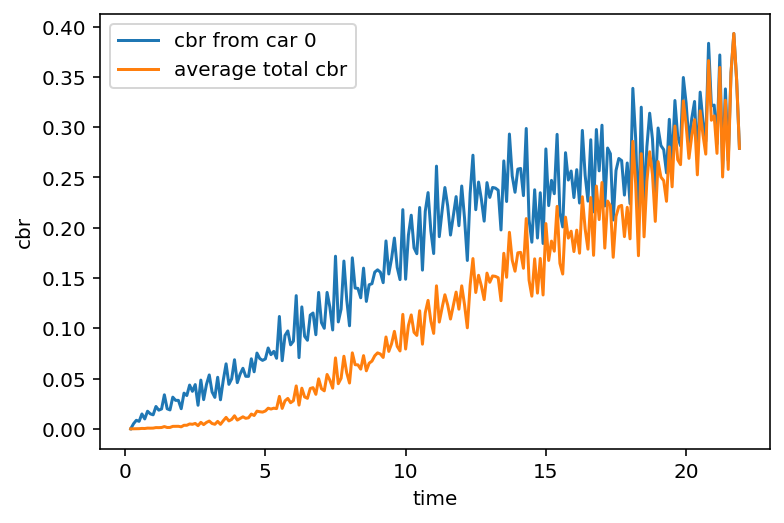

In [59]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr")
plt.legend()
plt.show()

In [60]:
# Time can be extracted from the first vector, since the first car was on the road the whole time
times = vectimes[0]
weight_of_time = 0
values = 0
vecvalues = []

# Iterate over times
for t in times:
    # Iterate over zipped times and values for each car
    for tv in time_values:
        # Time and value data of one car
        for time, value in tv:
            # If the actual car was on the road at the current timestamp,
            # Increase the weight of this timestamp and add its CBR data
            # to the list
            if t == time:
                weight_of_time += 1
                values += value
                break

    # Divide the sum of CBR values at the current timestamp with the # of cars on the road at that timestamp
    vecvalues.append(values / weight_of_time)
    weight_of_time = 0
    values = 0

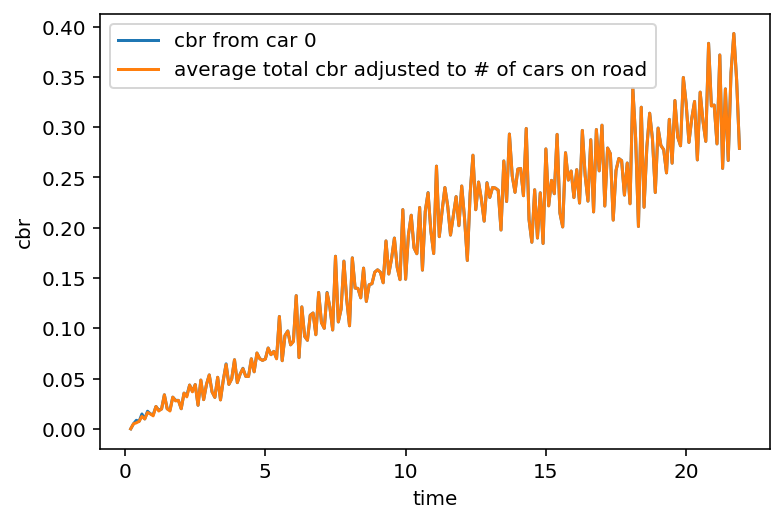

In [61]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr adjusted to # of cars on road")
plt.legend()
plt.show()

In [62]:
# Add cbr time and value of ith car to plot
def add_car_cbr_to_plot(plt, time_values, i):
    tmp = [[ t for t, v in time_values[i] ],  [ v for t, v in time_values[i] ]]
    plt.plot(tmp[0], tmp[1], label=f"cbr from car {i}")

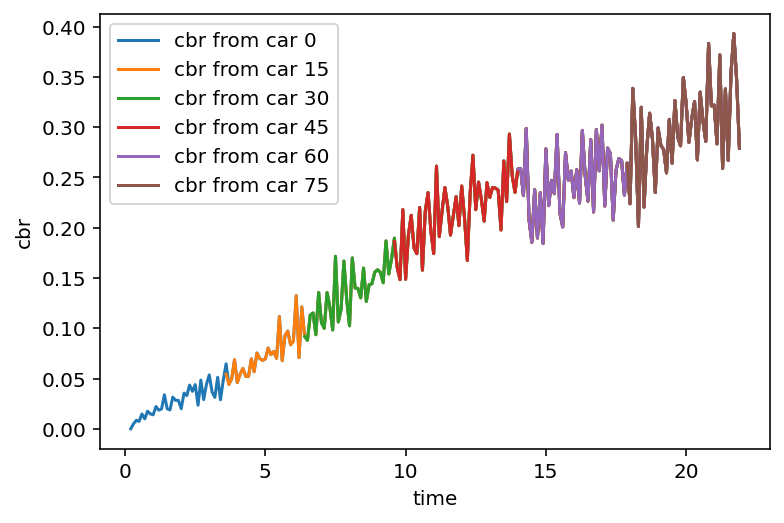

In [63]:
plt.xlabel("time")
plt.ylabel("cbr")
i = 0

add_car_cbr_to_plot(plt, time_values, 0)
add_car_cbr_to_plot(plt, time_values, 15)
add_car_cbr_to_plot(plt, time_values, 30)
add_car_cbr_to_plot(plt, time_values, 45)
add_car_cbr_to_plot(plt, time_values, 60)
add_car_cbr_to_plot(plt, time_values, 75)

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

scale_factor = 1

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.legend()
plt.show()